In [2]:
import numpy as np
import numpy.linalg
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.decomposition
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns
import requests, io

#Načtení dat

In [3]:
#https://homel.vsb.cz/~pla06/files/ml/data/dimred/bars_noise20.zip
#bars = pd.read_csv('/content/bars.csv', header=None).values

url = "https://homel.vsb.cz/~pla06/files/ml/data/dimred/bars.zip"
url_20 = "https://homel.vsb.cz/~pla06/files/ml/data/dimred/bars_noise20.zip"
url_50 = "https://homel.vsb.cz/~pla06/files/ml/data/dimred/bars_noise50.zip"

# Load directly from the ZIP (it contains CSV files)
r = requests.get(url, verify=False)
bars = pd.read_csv(io.BytesIO(r.content), compression="zip", header=None).values

r = requests.get(url_20, verify=False)
bars_noise_20 = pd.read_csv(io.BytesIO(r.content), compression="zip", header=None).values

r = requests.get(url_50, verify=False)
bars_noise_50 = pd.read_csv(io.BytesIO(r.content), compression="zip", header=None).values

c:\Users\ajrac\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'homel.vsb.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\ajrac\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'homel.vsb.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\ajrac\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'homel.vsb.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-war

In [4]:
bars.shape

(10000, 64)

In [5]:
bars[1]

array([  0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
       255,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255, 255, 255,
       255, 255, 255, 255,   0,   0, 255,   0,   0,   0,   0,   0])

In [6]:
bars_noise_20[1]

array([  0,   0, 225,   0,   0,   0,  48,   0,  44,   0, 220,  70,   0,
        54,   0,  70,   6,   0, 186,   0,   0,   0,   0,  48,   8,   0,
       255,  15,   0,   0,  14,  60, 255, 173, 193, 225, 255, 169, 164,
       255,   0,  80, 166,  81,   0,   0,   8, 112, 255, 241, 255, 255,
       236, 255, 255, 255,   0,   0, 255,   1,   0,   6, 120,   5])

In [7]:
bars_noise_50[1]

array([  8,   0, 132,   0,   0,   0, 255,   0,   0,   0, 255,  75,  74,
         0,  62,   0,  49, 124, 255, 197,  36, 126,   0,  39,  97,   0,
       201,   0, 144,   0, 141,   0, 255, 181,  87,   3, 165, 255,   0,
       192,  89,   0, 183,  89,   0,   0, 183,   0, 255,  83, 255, 255,
       255,  83, 255, 255,   0,   0, 201, 105,   0,   0,   0, 134])

In [8]:
def show_image(x):
    plt.imshow(x.reshape((8,8)), cmap='Greys')

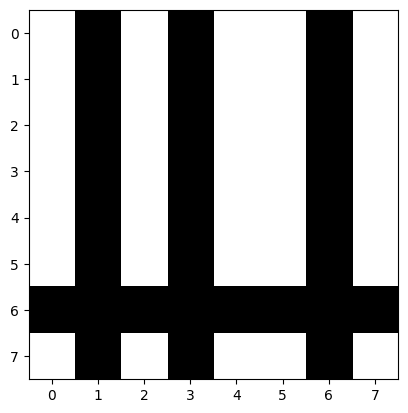

In [9]:
show_image(bars[2])

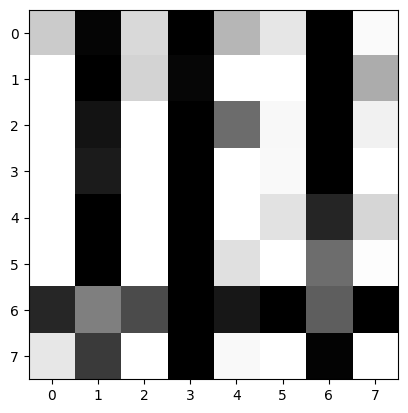

In [10]:
show_image(bars_noise_20[2])

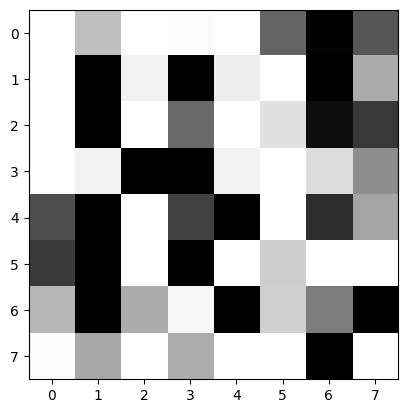

In [11]:
show_image(bars_noise_50[2])

#SVD dekompozice

Matice se rozloží na *U*, *s*, *V_T*:
- **U** - popisuje, jak se jednotlivé vzory (řádky) promítají do komponent
- **s** - určuje "sílu" a důležitost každé komponenty
- **V_T** - základní směry (vazby mezi sloupci)

In [12]:
U, s, V_T = np.linalg.svd(bars, full_matrices=True)
U.shape, s.shape, V_T.shape

((10000, 10000), (64,), (64, 64))

In [13]:
s

array([85163.72992057, 25918.78802989, 25885.20650461, 25866.61111402,
       25603.09250067, 25527.33634786, 25461.90923658, 25400.16904854,
       25323.96794768, 25273.05247869, 25090.65260469, 24985.09443308,
       24828.21166745, 24725.47151278, 24599.19377668,  4800.23207891,
        4759.42568525,  4752.02282845,  4714.65694697,  4693.37727937,
        4671.65765993,  4664.8800508 ,  4649.71482489,  4645.60988442,
        4627.47548092,  4613.28613569,  4608.32596123,  4601.90708787,
        4598.48440201,  4592.10180099,  4566.68918604,  4564.57307661,
        4539.47946295,  4528.18799301,  4515.34355164,  4503.88836915,
        4496.2987919 ,  4490.36008691,  4475.56266412,  4466.33868976,
        4461.80509601,  4454.28225144,  4444.18087738,  4433.82306676,
        4426.93951122,  4412.70949494,  4410.35912898,  4407.39023681,
        4392.68325091,  4367.7956838 ,  4356.32995984,  4352.68991712,
        4343.81015817,  4333.71349581,  4328.56992482,  4316.97332939,
      

In [14]:
np.diag(s)

array([[85163.72992057,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 25918.78802989,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        , 25885.20650461, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
         4218.36279764,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,  4216.42652516,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,  4141.90618514]], shape=(64, 64))

In [15]:
R = U[:, :64].dot(np.diag(s)).dot(V_T)
bars-R

array([[ 3.32225689e-13,  1.35859799e-11,  1.14384904e-11, ...,
         1.76214598e-12,  2.04636308e-12,  9.37916411e-13],
       [ 2.72565249e-13,  1.17174091e-13,  9.00683972e-11, ...,
         4.25129835e-11,  3.78288584e-11,  4.02311280e-11],
       [-1.84617595e-13,  1.70530257e-13,  2.83868379e-12, ...,
         6.44287141e-12,  1.17381660e-11,  1.09994959e-11],
       ...,
       [-1.31771913e-13,  8.52651283e-14,  1.47792889e-12, ...,
         1.37803788e-13,  4.97755149e-13,  2.47345118e-13],
       [-6.53699317e-13, -1.95030845e-13, -1.21354264e-12, ...,
        -1.86979445e-12, -1.27997461e-12,  5.68434189e-14],
       [ 2.37826033e-13,  5.83786979e-15, -1.43502079e-14, ...,
         5.68434189e-14,  5.68434189e-14, -1.70530257e-13]],
      shape=(10000, 64))

##Použití pouze 2 hlavních vektorů (redukce na 2 dimenze)

In [16]:
U[:, :2]

array([[-0.01089724,  0.02019641],
       [-0.00824357,  0.01339253],
       [-0.01084728, -0.005671  ],
       ...,
       [-0.01087723, -0.01541497],
       [-0.01086102, -0.00116561],
       [-0.00823218,  0.01164858]], shape=(10000, 2))

In [17]:
U[:, :2].shape

(10000, 2)

In [18]:
V_T[:2, :]

array([[-0.12576034, -0.12583471, -0.12446459, -0.12522232, -0.12453633,
        -0.12479076, -0.12320246, -0.12501406, -0.12368075, -0.12438685,
        -0.12219952, -0.12274359, -0.1239547 , -0.12395804, -0.12242578,
        -0.12374513, -0.12579543, -0.12611035, -0.12475121, -0.12483118,
        -0.1258248 , -0.125511  , -0.1238515 , -0.12529944, -0.1255637 ,
        -0.12730238, -0.12488608, -0.12613748, -0.12474634, -0.12421956,
        -0.12321001, -0.12535877, -0.12649177, -0.12752608, -0.1254781 ,
        -0.12578643, -0.12522948, -0.12697614, -0.12493317, -0.12562678,
        -0.12440544, -0.12568559, -0.1242691 , -0.12305136, -0.12453197,
        -0.12403298, -0.12287156, -0.12450303, -0.12667953, -0.12667078,
        -0.12424151, -0.1246307 , -0.12455422, -0.1243726 , -0.12256402,
        -0.12524289, -0.12736486, -0.12835399, -0.12557424, -0.1263055 ,
        -0.12606162, -0.12555467, -0.12399751, -0.12668234],
       [-0.14879275, -0.3026219 , -0.14459322, -0.15534514, -0.

###Rekonstrukční matice

In [19]:
R = U[:,:2].dot(np.diag(s[:2])).dot(V_T[:2, :])
R.shape

(10000, 64)

Text(0.5, 1.0, 'Original image')

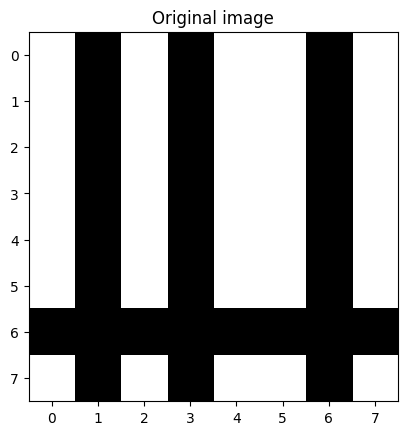

In [20]:
show_image(bars[2])
plt.title('Original image')

Text(0.5, 1.0, 'Reconstructed image when only 2 dimensions are used')

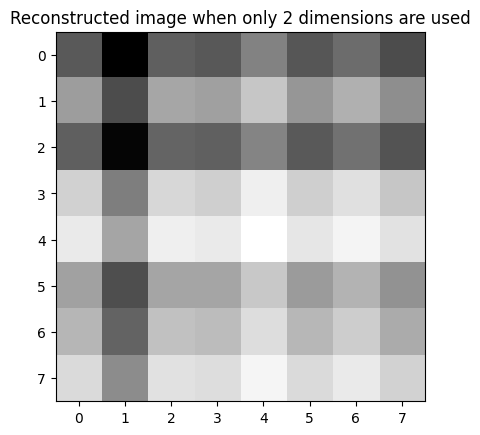

In [21]:
show_image(R[2])
plt.title('Reconstructed image when only 2 dimensions are used')

###Jaká je chyba rekonstruovaného obrázku?

In [22]:
print(bars[2]-R[2])

[-138.04716855   94.27346635 -136.23289444  116.48673785 -125.96066877
 -138.98746532  122.58700825 -141.59267083 -118.07959425  113.46785679
 -115.90146216  137.43546922 -106.93952453 -120.20670063  141.40095627
 -122.25953066 -136.25426227   96.05632658 -134.74150402  119.20907391
 -125.29088077 -138.00879748  124.00971646 -139.93253    -102.79335342
  127.78073069 -100.82071141  151.65415926  -90.43455688 -103.37698302
  158.09643653 -106.69051805  -92.40345806  138.77245118  -90.54209816
  162.7427821   -79.82437894  -94.14839564  168.13455855  -95.93784233
 -117.39758519  113.72534228 -116.21381398  138.68011369 -106.07904688
 -118.9003382   142.61895867 -121.36913667  143.21790805  120.05667386
  146.42920254  144.74909832  156.54241008  143.49260843  150.54840349
  140.33300022  -99.27338252  132.10322482  -96.51438041  156.62758269
  -86.3755825   -99.40850761  162.38652502 -102.56522281]


In [23]:
print(bars-R)

[[ -38.82384063   41.63154906  -39.81963441 ...   79.43797226
    61.80658956   85.92360073]
 [ -36.64173756   16.70295695  217.81021305 ... -127.29699695
  -138.85369633 -123.09399482]
 [-138.04716855   94.27346635 -136.23289444 ...  -99.40850761
   162.38652502 -102.56522281]
 ...
 [-175.94573272   17.52487671   81.93244352 ...  -71.24370697
   -55.24104867  -78.03726877]
 [ 134.18087392 -125.53528182 -119.4937329  ... -112.72620642
  -110.18491655  140.79602614]
 [ -43.24537368    3.14613226  -43.60485622 ...  132.92295362
   123.0119945   136.47664907]]


In [24]:
np.linalg.norm(bars-R)

np.float64(96381.65688074689)

##TASK 1: vyzkoušejte použití různých dimenzí

Proveďte SVD a rekonstruujte data pro dimenze 5, 10 a 16. Spočítejte rekonstrukční chybu pro dimenze 5, 10 a 16.

In [ ]:
dims = [5, 10, 16]
errors = {}
for d in dims:
    # Rekonstrukce pomocí d dimenzí
    R_d = U[:, :d].dot(np.diag(s[:d])).dot(V_T[:d, :])
    # Výpočet rekonstrukční chyby (Frobeniova norma rozdílu)
    error = np.linalg.norm(bars - R_d)
    errors[d] = error
    print(f"Dimenze: {d}, Rekonstrukční chyba: {error:.4f}")

Dimenze: 5, Rekonstrukční chyba: 85409.4840
Dimenze: 10, Rekonstrukční chyba: 63793.6290
Dimenze: 16, Rekonstrukční chyba: 30981.9256


##TASK 2: kolik dimenzí je potřeba k dostatečnému zrekontruování obrázků s šumem 20 a 50?

Naše datové soubory bars_noise_20 a bars_noise_50 obsahují šum, chceme použít redukci dimenzí k eliminaci vlivu šumu v našem datovém souboru.
Vyzkoušejte různé počty dimenzí pro redukci dimenzí, vypočítejte Frobeniovu normu pro rekonstruovanou a původní matici, poté vytvořte graf s hodnotami chyb rekonstrukce.

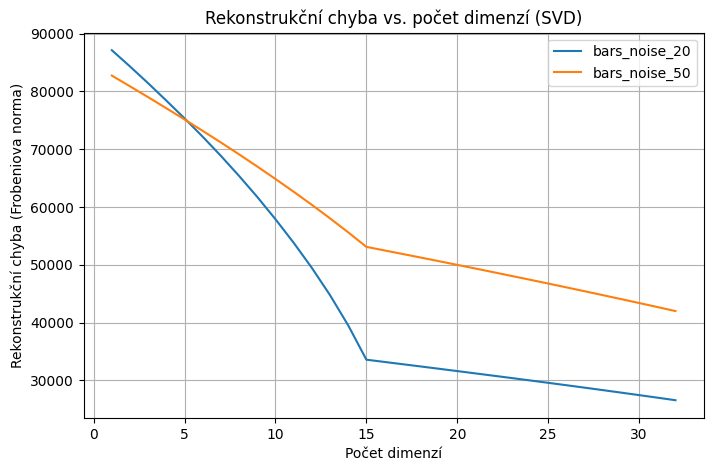

In [ ]:
dims = range(1, 33)
errors_20 = []
errors_50 = []

U_20, s_20, V_T_20 = np.linalg.svd(bars_noise_20, full_matrices=True)
for d in dims:
    R_20 = U_20[:, :d].dot(np.diag(s_20[:d])).dot(V_T_20[:d, :])
    error_20 = np.linalg.norm(bars_noise_20 - R_20)
    errors_20.append(error_20)

U_50, s_50, V_T_50 = np.linalg.svd(bars_noise_50, full_matrices=True)
for d in dims:
    R_50 = U_50[:, :d].dot(np.diag(s_50[:d])).dot(V_T_50[:d, :])
    error_50 = np.linalg.norm(bars_noise_50 - R_50)
    errors_50.append(error_50)

# Graf chyb rekonstrukce
plt.figure(figsize=(8,5))
plt.plot(dims, errors_20, label='bars_noise_20')
plt.plot(dims, errors_50, label='bars_noise_50')
plt.xlabel('Počet dimenzí')
plt.ylabel('Rekonstrukční chyba (Frobeniova norma)')
plt.title('Rekonstrukční chyba vs. počet dimenzí (SVD)')
plt.legend()
plt.grid(True)
plt.show()

#NNMF

NNMF vyžaduje nezáporná data. Proto je vhodné data oříznout nebo posunout.

In [ ]:
from sklearn.decomposition import NMF

##TASK 3: aplikuj NNMF na bars datasety

Aplikujte NMF pro dimenze 2, 5, 10 a 16 (na bars i noisy varianty). Proveďte rekonstrukci a vypočítejte chybu.

bars, dimenze: 2, rekonstrukční chyba: 96417.6884
bars, dimenze: 5, rekonstrukční chyba: 85859.8339
bars, dimenze: 10, rekonstrukční chyba: 66128.9409
bars, dimenze: 16, rekonstrukční chyba: 37411.7715
bars_noise_20, dimenze: 2, rekonstrukční chyba: 84339.2360
bars_noise_20, dimenze: 5, rekonstrukční chyba: 75759.8623
bars_noise_20, dimenze: 10, rekonstrukční chyba: 59243.2071
bars_noise_20, dimenze: 16, rekonstrukční chyba: 33730.9268
bars_noise_50, dimenze: 2, rekonstrukční chyba: 80911.6219
bars_noise_50, dimenze: 5, rekonstrukční chyba: 75490.6327
bars_noise_50, dimenze: 10, rekonstrukční chyba: 65491.7447
bars_noise_50, dimenze: 16, rekonstrukční chyba: 54340.6226


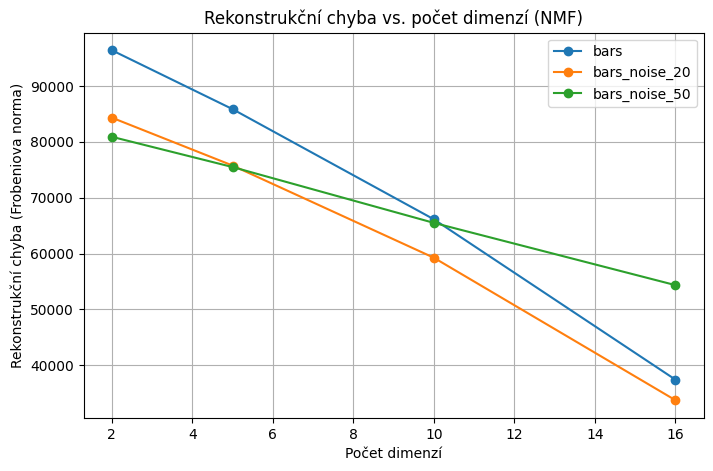

In [ ]:
from sklearn.decomposition import NMF

nmf_dims = [2, 5, 10, 16]
datasets = {'bars': bars, 'bars_noise_20': bars_noise_20, 'bars_noise_50': bars_noise_50}
nmf_errors = {name: [] for name in datasets}

for name, data in datasets.items():
    data_nmf = np.clip(data, 0, None)
    for d in nmf_dims:
        model = NMF(n_components=d, init='nndsvda', max_iter=500, random_state=42)
        W = model.fit_transform(data_nmf)
        H = model.components_
        R_nmf = np.dot(W, H)
        error = np.linalg.norm(data_nmf - R_nmf)
        nmf_errors[name].append(error)
        print(f"{name}, dimenze: {d}, rekonstrukční chyba: {error:.4f}")

plt.figure(figsize=(8,5))
for name in datasets:
    plt.plot(nmf_dims, nmf_errors[name], marker='o', label=name)
plt.xlabel('Počet dimenzí')
plt.ylabel('Rekonstrukční chyba (Frobeniova norma)')
plt.title('Rekonstrukční chyba vs. počet dimenzí (NMF)')
plt.legend()
plt.grid(True)
plt.show()

#MNIST

In [29]:
url_mnist = "https://homel.vsb.cz/~pla06/files/ml/data/dimred/mnist.zip"
url_labels = "https://homel.vsb.cz/~pla06/files/ml/data/dimred/mnist_labels.zip"

r = requests.get(url_mnist, verify=False)
mnist = pd.read_csv(io.BytesIO(r.content), compression="zip", header=None).values

r = requests.get(url_labels, verify=False)
mnist_labels = pd.read_csv(io.BytesIO(r.content), compression="zip", header=None).values

c:\Users\ajrac\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'homel.vsb.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\ajrac\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'homel.vsb.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
c:\Users\ajrac\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'homel.vsb.cz'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-war

In [30]:
mnist.shape

(60000, 784)

In [31]:
mnist[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [32]:
def show_image_mnist(x):
    plt.imshow(x.reshape((28,28)), cmap='Greys')

Text(0.5, 1.0, 'Label: [0]')

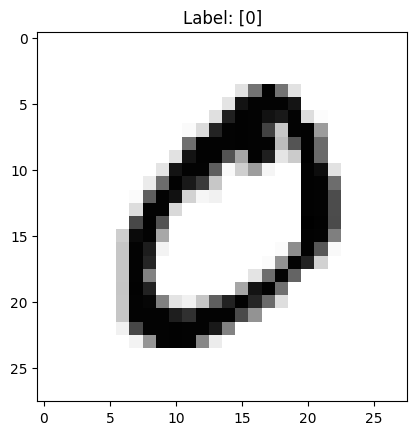

In [33]:
show_image_mnist(mnist[1])
plt.title(f'Label: {mnist_labels[1]}')

Text(0.5, 1.0, 'Label: [3]')

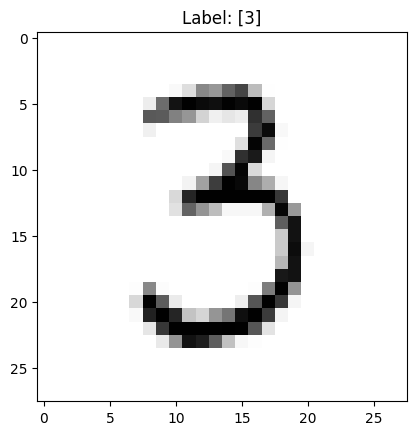

In [34]:
show_image_mnist(mnist[50])
plt.title(f'Label: {mnist_labels[50]}')

##TASK 4: 2D zobrazení pomocí SVD

Na dataset mnist aplikujte SVD rozklad a vizualizujte ve vektorovém prostoru. Body obarvěte pomocí labelů.

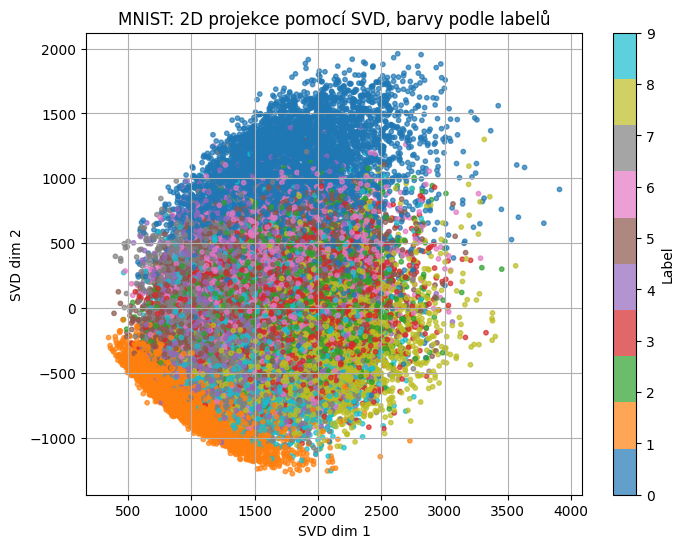

In [ ]:
if len(mnist_labels.shape) > 1:
    mnist_labels_flat = mnist_labels.flatten()
else:
    mnist_labels_flat = mnist_labels

U_mnist, s_mnist, V_T_mnist = np.linalg.svd(mnist, full_matrices=False)
X_2d = U_mnist[:, :2] * s_mnist[:2]

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=mnist_labels_flat, cmap='tab10', s=10, alpha=0.7)
plt.xlabel('SVD dim 1')
plt.ylabel('SVD dim 2')
plt.title('MNIST: 2D projekce pomocí SVD, barvy podle labelů')
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label('Label')
plt.grid(True)
plt.show()

##TASK 5: Rekonstrukce z redukovaného SVD

Na dataset MNIST aplikujte SVD a pro různé počty dimenzí(např. 5, 10, 16, 20) vytvořte 2D projekce a vykreslete je jako scatter ploty s barvami podle labelů.

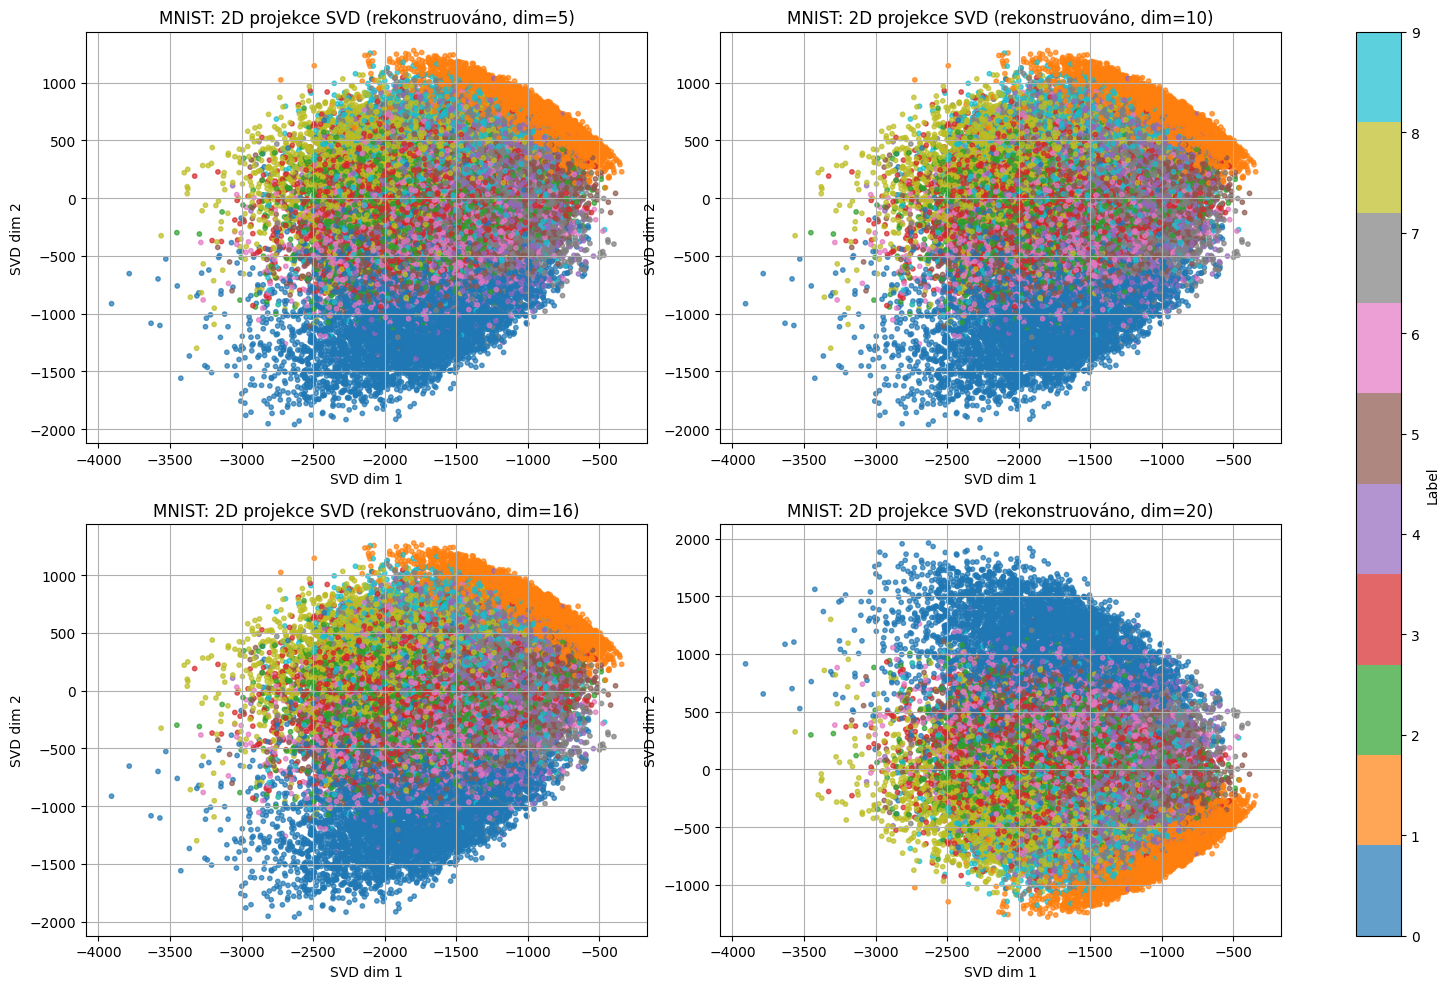

In [ ]:
svd_dims = [5, 10, 16, 20]
if len(mnist_labels.shape) > 1:
    mnist_labels_flat = mnist_labels.flatten()
else:
    mnist_labels_flat = mnist_labels

U_mnist, s_mnist, V_T_mnist = np.linalg.svd(mnist, full_matrices=False)

plt.figure(figsize=(16,10))
for i, d in enumerate(svd_dims):
    R_d = U_mnist[:, :d] * s_mnist[:d] @ V_T_mnist[:d, :]
    U_proj, s_proj, V_T_proj = np.linalg.svd(R_d, full_matrices=False)
    X_2d = U_proj[:, :2] * s_proj[:2]
    plt.subplot(2,2,i+1)
    scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=mnist_labels_flat, cmap='tab10', s=10, alpha=0.7)
    plt.xlabel('SVD dim 1')
    plt.ylabel('SVD dim 2')
    plt.title(f'MNIST: 2D projekce SVD (rekonstruováno, dim={d})')
    plt.grid(True)
plt.tight_layout()
cbar = plt.colorbar(scatter, ax=plt.gcf().axes, ticks=range(10))
cbar.set_label('Label')
plt.show()

#PCA a t-SNE

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
mnist_scaled = mnist.astype('float32') / 255.0

##TASK 6: 2D projekce PCA/t-SNE

Použijte matici mnist_scaled k redukci dimenze pomocí PCA a t-SNE do 2D a výsledky zobrazte jako scatter ploty s barvami podle labelů.


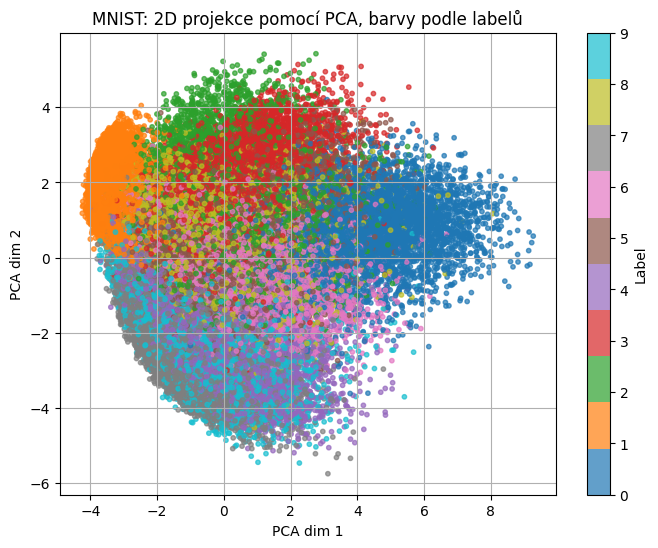

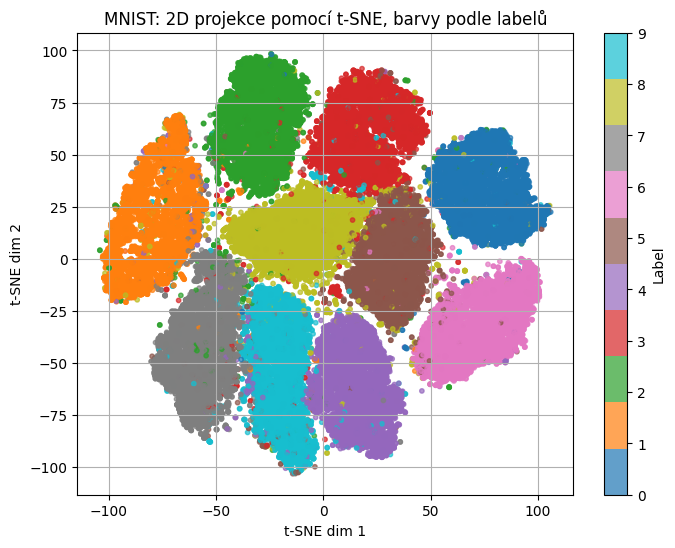

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

if len(mnist_labels.shape) > 1:
    mnist_labels_flat = mnist_labels.flatten()
else:
    mnist_labels_flat = mnist_labels

pca = PCA(n_components=2, random_state=42)
mnist_pca_2d = pca.fit_transform(mnist_scaled)
plt.figure(figsize=(8,6))
scatter = plt.scatter(mnist_pca_2d[:,0], mnist_pca_2d[:,1], c=mnist_labels_flat, cmap='tab10', s=10, alpha=0.7)
plt.xlabel('PCA dim 1')
plt.ylabel('PCA dim 2')
plt.title('MNIST: 2D projekce pomocí PCA, barvy podle labelů')
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label('Label')
plt.grid(True)
plt.show()

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
mnist_tsne_2d = tsne.fit_transform(mnist_scaled)
plt.figure(figsize=(8,6))
scatter = plt.scatter(mnist_tsne_2d[:,0], mnist_tsne_2d[:,1], c=mnist_labels_flat, cmap='tab10', s=10, alpha=0.7)
plt.xlabel('t-SNE dim 1')
plt.ylabel('t-SNE dim 2')
plt.title('MNIST: 2D projekce pomocí t-SNE, barvy podle labelů')
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.set_label('Label')
plt.grid(True)
plt.show()

#Titanic

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/titanic.csv', index_col=0)
df.head()

In [ ]:
df_clustering = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()

In [ ]:
df_clustering = df_clustering.dropna()

In [ ]:
df_encoded = pd.DataFrame(index = df_clustering.index)
df_encoded['Sex'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df_clustering[['Sex']])
df_encoded = df_encoded.join(pd.get_dummies(df_clustering[['Embarked']]))

In [ ]:
col_names = ['Fare', 'Age', 'SibSp', 'Parch', 'Pclass']
enc = sklearn.preprocessing.StandardScaler()
X_stand = pd.DataFrame(enc.fit_transform(df_clustering.loc[:, col_names]), columns = col_names, index=df_clustering.index)
X_stand = pd.concat([X_stand, df_encoded.loc[:, ['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']], df_clustering.Survived], axis=1)

In [ ]:
X_stand

##BONUS TASK - Shlukování + 2D vizualizace (Titanic)

Použijte předzpracovanou matici X_scaled. Zvolte libovolný shlukovací algoritmus, najděte shluky a uložte labely jako cluster_id. Poté použijte PCA a t-SNE k redukci dimenze a vytvořte scatter ploty, kde barva bodů zobrazuje cluster_id.